In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/Absenteeism_at_work.csv')

In [3]:
Data

,Unnamed: 0,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,0,11,26,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,4
1,1,36,0,7,3,1,118,13,18,50,...,1,1,1,1,0,0,98,178,31,0
2,2,3,23,7,4,1,179,51,18,38,...,0,1,0,1,0,0,89,170,31,2
3,3,7,7,7,5,1,279,5,14,39,...,0,1,2,1,1,0,68,168,24,4
4,4,11,23,7,5,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,11,14,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,8
736,736,1,11,7,3,1,235,11,14,37,...,0,3,1,0,0,1,88,172,29,4
737,737,4,0,0,3,1,118,14,13,40,...,0,1,1,1,0,8,98,170,34,0
738,738,8,0,0,4,2,231,35,14,39,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df=Data.drop('Unnamed: 0',axis=1)
df.head()

,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Individual_identification        740 non-null    int64
 1   Reason_for_absence               740 non-null    int64
 2   Month_of_absence                 740 non-null    int64
 3    Day_of_the_week                 740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation_expense           740 non-null    int64
 6   Distance_from_Residence_to_Work  740 non-null    int64
 7   Service_time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9    Work_load_Average               740 non-null    int64
 10  Hit_target                       740 non-null    int64
 11  Disciplinary_failure             740 non-null    int64
 12  Education                        740 non-null    i

In [6]:
df.isna().sum()

Individual_identification          0
Reason_for_absence                 0
Month_of_absence                   0
 Day_of_the_week                   0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
 Work_load_Average                 0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

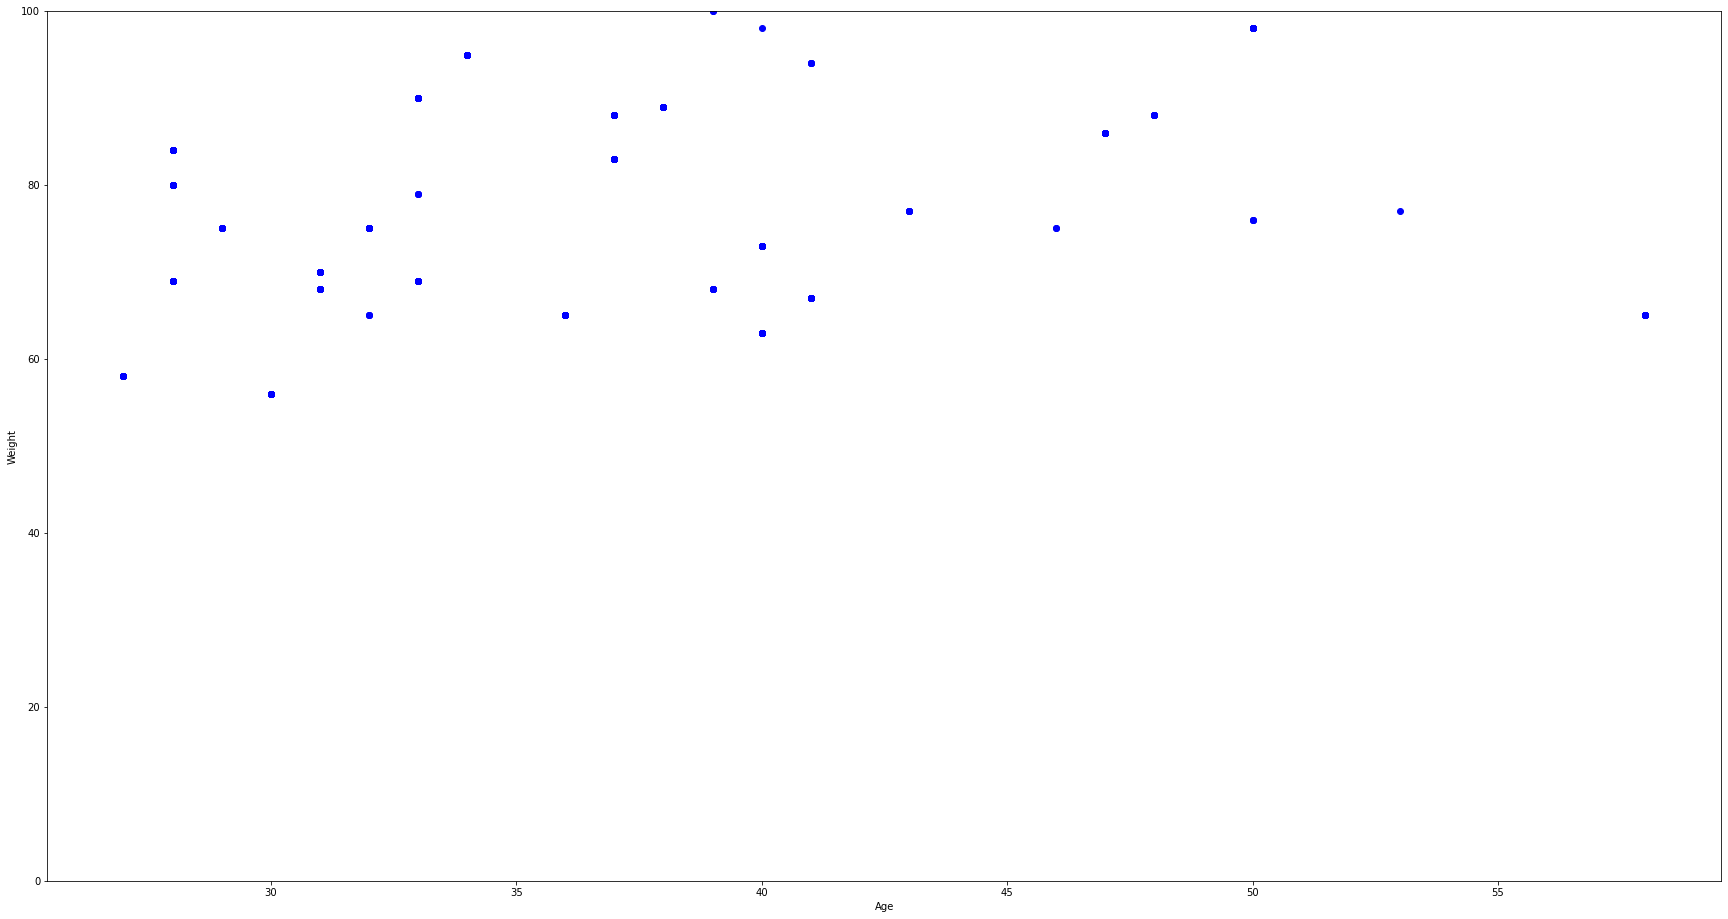

In [14]:
plt.figure(figsize=(30,16))
plt.plot(df.Age,df.Weight,'bo')
plt.ylabel('Weight')
plt.xlabel('Age')
plt.ylim(0,100)
plt.show()

In [8]:
X = df.values[:,1:]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
Absenteeism_dataset = StandardScaler().fit_transform(X)
Absenteeism_dataset

array([[ 0.80493838,  0.19676258, -0.64394734, ..., -0.01904601,
         0.77593223, -0.21951111],
       [-2.28012426,  0.19676258, -0.64394734, ...,  0.97582783,
         1.00943766, -0.51976661],
       [ 0.44896961,  0.19676258,  0.0599242 , ..., -0.35067062,
         1.00943766, -0.36963886],
       ...,
       [-2.28012426, -1.84169773, -0.64394734, ..., -0.35067062,
         1.70995395, -0.51976661],
       [-2.28012426, -1.84169773,  0.0599242 , ..., -0.35067062,
         1.94345938, -0.51976661],
       [-2.28012426, -1.84169773,  1.46766727, ...,  0.47839091,
        -0.39159492, -0.51976661]])

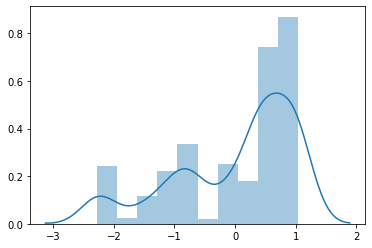

In [12]:
col_1 = Absenteeism_dataset[:,:1]
sns.distplot(col_1)

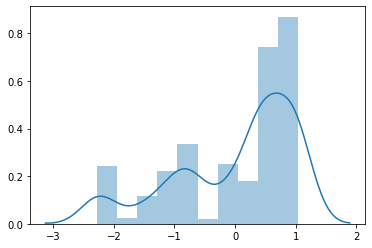

In [13]:
col_2 = Absenteeism_dataset[:,:1]
sns.distplot(col_2)

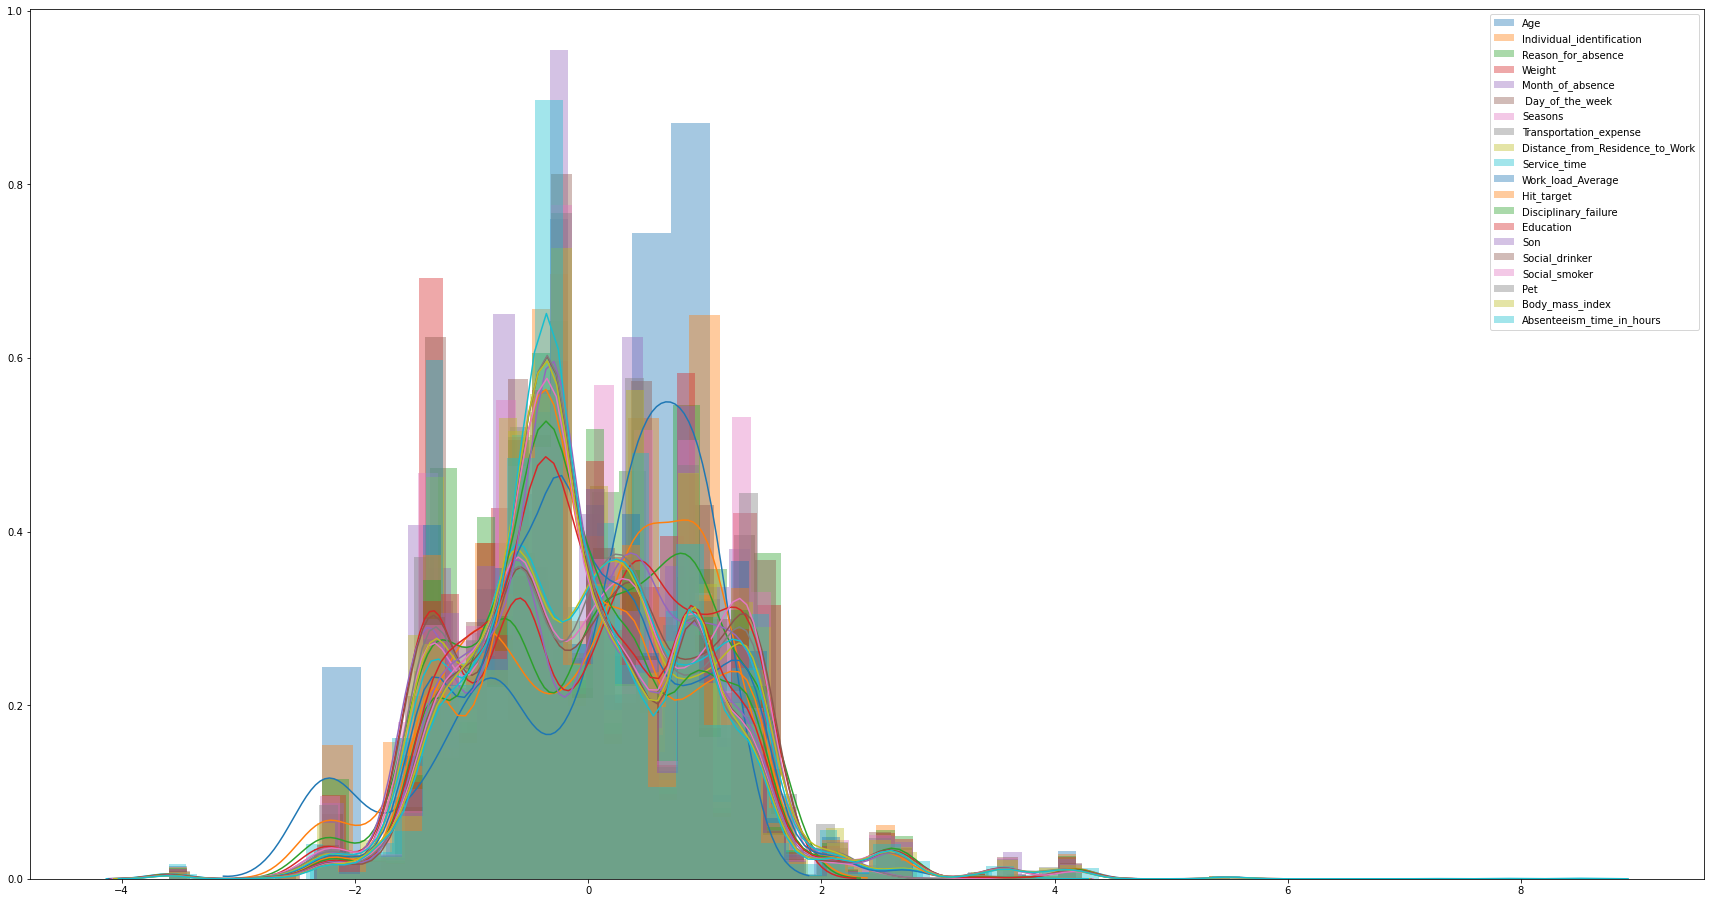

In [15]:
col_1 = Absenteeism_dataset[:,:1]
col_2 = Absenteeism_dataset[:,:2]
col_3 = Absenteeism_dataset[:,:3]
col_4 = Absenteeism_dataset[:,:4]
col_5 = Absenteeism_dataset[:,:5]
col_6 = Absenteeism_dataset[:,:6]
col_7 = Absenteeism_dataset[:,:7]
col_8 = Absenteeism_dataset[:,:8]
col_9 = Absenteeism_dataset[:,:9]
col_10 = Absenteeism_dataset[:,:10]
col_11 = Absenteeism_dataset[:,:11]
col_12 = Absenteeism_dataset[:,:12]
col_13 = Absenteeism_dataset[:,:13]
col_14 = Absenteeism_dataset[:,:14]
col_15 = Absenteeism_dataset[:,:15]
col_16 = Absenteeism_dataset[:,:16]
col_17 = Absenteeism_dataset[:,:17]
col_18 = Absenteeism_dataset[:,:18]
col_19 = Absenteeism_dataset[:,:19]
col_20 = Absenteeism_dataset[:,:20]
plt.figure(figsize=(30,16))
sns.distplot(col_1,label='Age')
sns.distplot(col_2,label='Individual_identification')
sns.distplot(col_3,label='Reason_for_absence')
sns.distplot(col_4,label='Weight')
sns.distplot(col_5,label='Month_of_absence')
sns.distplot(col_6,label=' Day_of_the_week')
sns.distplot(col_7,label='Seasons')
sns.distplot(col_8,label='Transportation_expense')
sns.distplot(col_9,label='Distance_from_Residence_to_Work')
sns.distplot(col_10,label='Service_time')
sns.distplot(col_11,label='Work_load_Average')
sns.distplot(col_12,label='Hit_target')
sns.distplot(col_13,label='Disciplinary_failure')
sns.distplot(col_14,label='Education')
sns.distplot(col_15,label='Son')
sns.distplot(col_16,label='Social_drinker')
sns.distplot(col_17,label='Social_smoker')
sns.distplot(col_18,label='Pet')
sns.distplot(col_19,label='Body_mass_index')
sns.distplot(col_20,label='Absenteeism_time_in_hours')
plt.legend()

In [16]:
from sklearn.cluster import KMeans
No_of_clusters = 3
Kmeans = KMeans(init = "k-means++",n_clusters=No_of_clusters,n_init=12)
Kmeans.fit(X)

KMeans(n_clusters=3, n_init=12)

In [17]:
Labels = Kmeans.labels_
Labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
df['Target'] =Labels
df.head()

,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Target
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98,178,31,0,1
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,1
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,1
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,1


In [19]:
df.groupby('Target').mean()

,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Target,,,,,,,,,,,,,,,,,,,,,
0,19.131343,18.579104,7.334328,3.988060,2.716418,221.238806,28.558209,11.958209,35.883582,280648.558209,...,0.062687,1.301493,0.961194,0.501493,0.056716,0.877612,78.361194,172.002985,26.486567,6.579104
1,16.750799,20.482428,5.971246,3.843450,2.338658,219.571885,30.916933,13.019169,36.964856,238557.555911,...,0.044728,1.322684,1.006390,0.613419,0.076677,0.603834,79.629393,171.725240,27.009585,6.674121
2,18.271739,17.228261,3.847826,3.891304,2.619565,227.641304,29.163043,13.141304,36.760870,350184.695652,...,0.054348,1.152174,1.271739,0.652174,0.119565,0.750000,79.467391,173.847826,26.239130,9.032609


Text(0, 0.5, 'Weight')

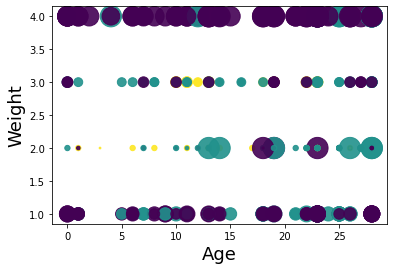

In [20]:
area = np.pi*(X[:,1])**2
plt.scatter(X[:,0],X[:,3],s=area,c=Labels.astype(np.float),alpha=0.9)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Weight",fontsize=18)